# Проект исследования оттока клиентов сети фитнес-центров

## Описание проекта

Сеть фитнес-центров «Культурист-датасаентист» разрабатывает стратегию взаимодействия с клиентами на основе аналитических данных.
Распространённая проблема фитнес-клубов и других сервисов — отток клиентов. Как понять, что клиент больше не с вами? Можно записать в отток тех, кто попросил закрыть договор или удалил аккаунт. Однако клиенты не всегда уходят демонстративно: чаще перестают пользоваться сервисом тихо.
Индикаторы оттока зависят от специфики отрасли. Когда пользователь редко, но стабильно закупается в интернет-магазине — не похоже, что он «отвалился». А вот если две недели не заходит на канал с ежедневно обновляемым контентом, дела плохи: подписчик заскучал и, кажется, оставил вас.
Для фитнес-центра можно считать, что клиент попал в отток, если за последний месяц ни разу не посетил спортзал. Конечно, не исключено, что он уехал на Бали и по приезде обязательно продолжит ходить на фитнес. Однако чаще бывает наоборот. Если клиент начал новую жизнь с понедельника, немного походил в спортзал, а потом пропал — скорее всего, он не вернётся.
Чтобы бороться с оттоком, отдел по работе с клиентами «Культуриста-датасаентиста» перевёл в электронный вид множество клиентских анкет. Наша задача — провести анализ и подготовить план действий по удержанию клиентов.
А именно:
- научиться прогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;
- сформировать типичные портреты клиентов: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;
- проанализировать основные признаки, наиболее сильно влияющие на отток;
- сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:
    1) выделить целевые группы клиентов;
    2) предложить меры по снижению оттока;
    3) определить другие особенности взаимодействия с клиентами.

## Описание данных

«Культурист-датасаентист» предоставил сведения в csv-файлах. Заказчик подготовил данные, которые содержат данные на месяц до оттока и факт оттока на определённый месяц. Набор данных включает следующие поля:

Данные клиента за предыдущий до проверки факта оттока месяц:
- 'gender' — пол;
- 'Near_Location' — проживание или работа в районе, где находится фитнес-центр;
- 'Partner' — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент (в таком случае фитнес-центр хранит информацию о работодателе клиента);
- 'Promo_friends' — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);
- 'Phone' — наличие контактного телефона;
- 'Age' — возраст;
- 'Lifetime' — время с момента первого обращения в фитнес-центр (в месяцах).

Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:
- 'Contract_period' — длительность текущего действующего абонемента (месяц, 6 месяцев, год);
- 'Month_to_end_contract' — срок до окончания текущего действующего абонемента (в месяцах);
- 'Group_visits' — факт посещения групповых занятий;
- 'Avg_class_frequency_total' — средняя частота посещений в неделю за все время с начала действия абонемента;
- 'Avg_class_frequency_current_month' — средняя частота посещений в неделю за предыдущий месяц;
- 'Avg_additional_charges_total' — суммарная выручка от других услуг фитнес-центра: кафе, спорттовары, косметический и массажный салон.
- 'Churn' — факт оттока в текущем месяце.

## Импорт библиотек и данных

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
import itertools
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score

import os

In [2]:
pth1 = 'D:\Yandex_Practikum\ML\gym_churn.csv'
pth2 = '/datasets/gym_churn.csv'

if os.path.exists(pth1):
    gym = pd.read_csv(pth1, sep=',')
elif os.path.exists(pth2):
    gym = pd.read_csv(pth2, sep=',')
else:
    print('Something is wrong')
          
display(gym.head())

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


## Предобработка данных

In [3]:
gym.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [4]:
gym.columns = gym.columns.str.lower() # приведем названия столбцов к единому регистру

In [5]:
print(gym.isna().sum())
print(gym.duplicated().sum())
gym.describe()

gender                               0
near_location                        0
partner                              0
promo_friends                        0
phone                                0
contract_period                      0
group_visits                         0
age                                  0
avg_additional_charges_total         0
month_to_end_contract                0
lifetime                             0
avg_class_frequency_total            0
avg_class_frequency_current_month    0
churn                                0
dtype: int64
0


,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


<div class="alert alert-info">
    
Типы данных в нужном формате. Пропуски и дубликаты отсутствуют.
- доли мужчин и женщин среди клиентов примерно одинаковы
- большинство клиентов проживают в непосредственной близости от фитнес-центра
- почти половина являются корпоративными клиентами
- чуть менее трети пришли по программе "Приведи друга"
- средний срок абонемента составляет чуть менее 5 месяцев, т.е. преобладает доля краткосрочных абонементов
- более одной трети посещают групповые занятия
- средний возраст клиентов 29 лет, в основном +-3 года
- средняя выручка на клиента 146 тысяч, с базой распределения от 50 до 240 тысяч
- средняя длительность посещения и срок до окончания абонемента фитнес-центра около 4 месяцев, с примерно таким же стандартным отклонением. Это значит основная доля абонементов на 1 и 6 месяцев
- в неделю центр посещают в среднем около 2 раз, в основе от 1 до 3 посещений
- доля оттока в среднем около 26%
    
</div>

## Проведем исследовательский анализ данных

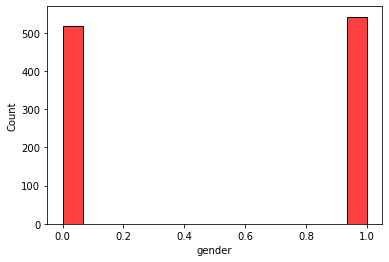

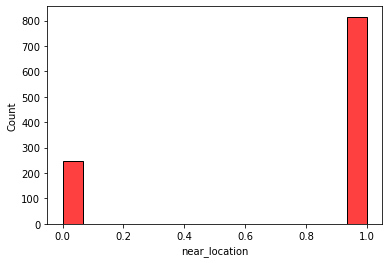

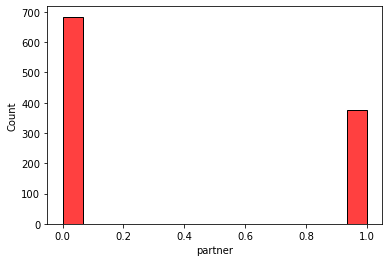

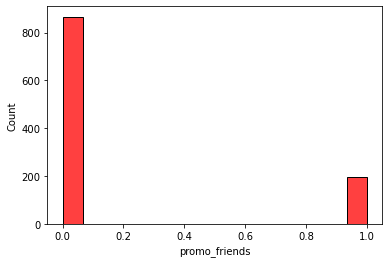

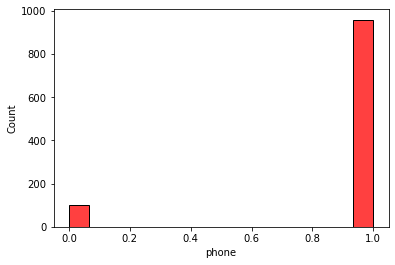

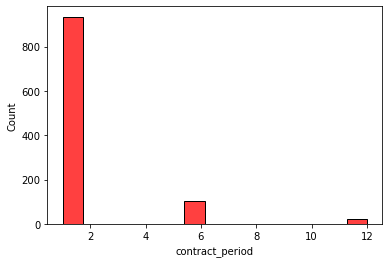

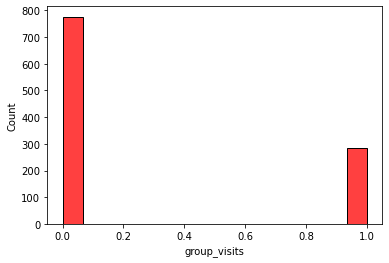

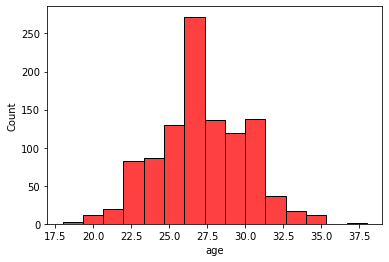

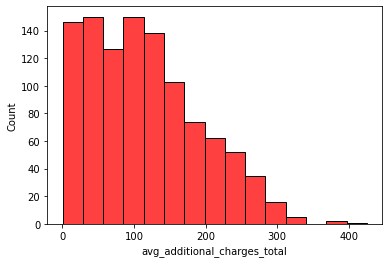

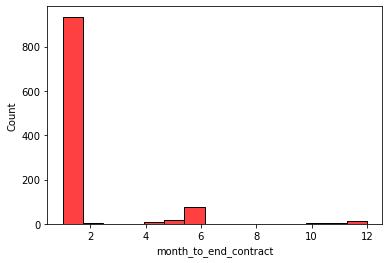

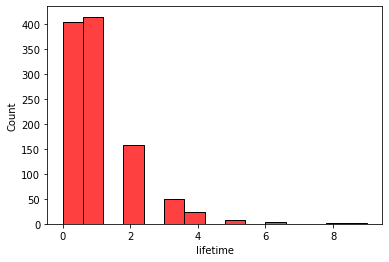

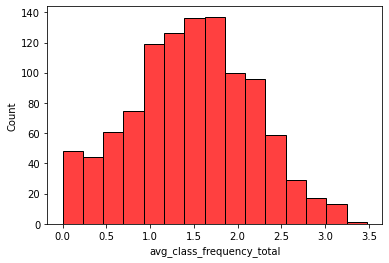

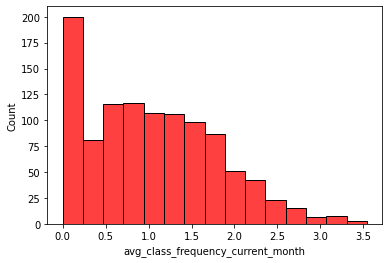

In [6]:
gym1 = gym.query('churn == 1') # посмотрим распределения признаков у тех, кто ушел в отток
for col in gym1.columns[:-1]:
    sns.histplot(gym1[col], bins=15, color='red')
    plt.show()

<div class="alert alert-info">

#### Показатели признаков для клиентов оттока:
- доли мужчин и женщин также примерно одинаковы
- клиентов проживающих в непосредственной близости от фитнес-центра почти в 4 раза больше, чем остальных. Возможно близость центра к дому слабо коррелирует с оттоком
- в оттоке преобладают некорпоративные клиенты
- в 4 раза больше пришли без приглашения "Приведи друга". Промоушен от друзей и их совместное посещение положительно коррелирует с фактом оттока клиента.
- подавляющее большинство клиентов из оттока используют абонемент на 1 месяц
- из них примерно четверть посещали групповые занятия
- основу возрастного распределения составляют клиенты от 22 до 31 года
- распределение выручки скошено в меньшие значения, тратят они в основном меньше среднего
- среднее количество посещений клиентов оттока от 1 до 2 в неделю
- в неделю распределение посещений от 0 до 2.5, при этом значительная часть не посещают вообще за последний месяц и сумма посещений в основном меньше среднего.
    
</div>

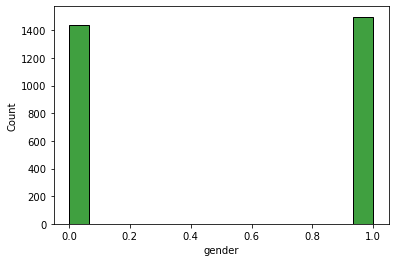

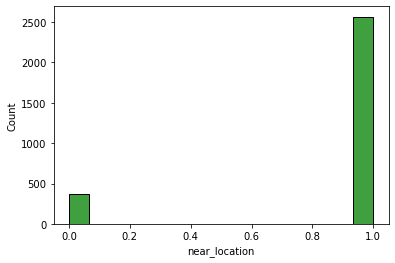

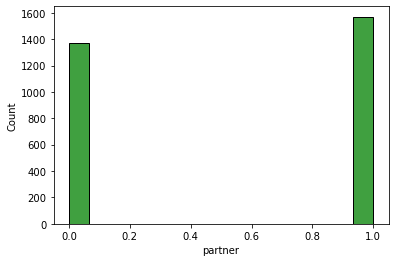

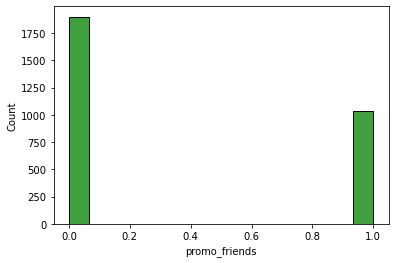

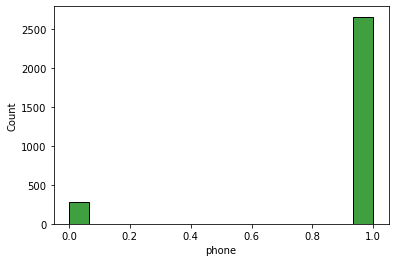

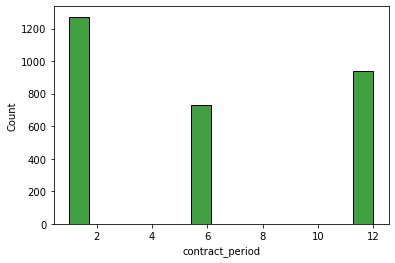

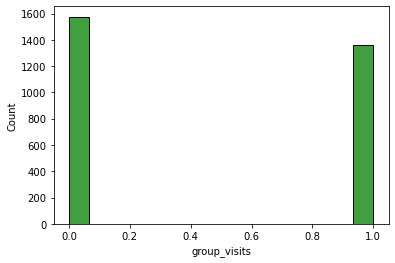

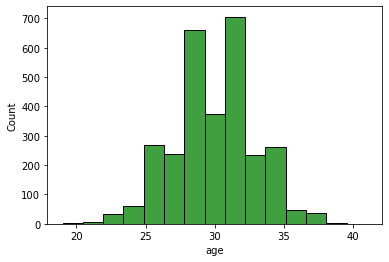

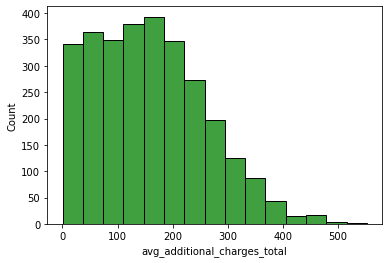

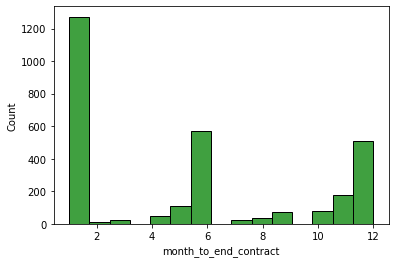

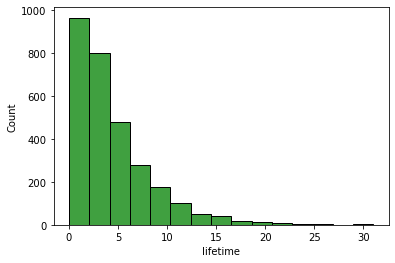

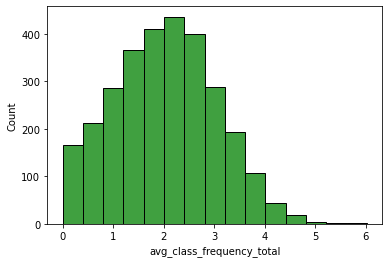

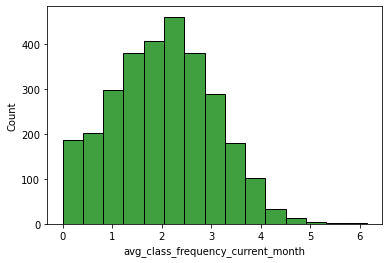

In [7]:
gym0 = gym.query('churn == 0') # посмотрим распределения признаков у тех, кто не ушел в отток
for col in gym0.columns[:-1]:
    sns.histplot(gym0[col], bins=15, color='green')
    plt.show()

<div class="alert alert-info">

#### Показатели признаков для клиентов без оттока:
- доли мужчин и женщин также примерно одинаковы
- клиентов проживающих в непосредственной близости от фитнес-центра более чем в 5 раз больше, чем остальных.
- корпоративных клиентов чуть больше среди постоянных
- в 4 раза больше пришли без приглашения "Приведи друга". Разница в количестве клиентов, пришедших по акции "Приведи друга", вдвое меньше, подтверждает гипотезу о более высокой лояльности клиентов, приглашенных друзьями
- среди клиентов без оттока присутствуют в значительной доле все виды контракта (1, 6 и 12 месяцев)
- постоянные клиенты примерно в равной степени посещают как индивидуальные, так и групповые занятия
- в отличии от сегмента с оттоком, основу распределения составляют более возрастные клиенты от 25 до 35 лет
- по общей выручке они тратят примерно на 25% больше
- большая часть занимаются регулярно не более максимального срока абонемента 12 мес.
- среднее количество посещений клиентов без оттока от 1 до 3 занятий в неделю, при этом за последний месяц эти показатели не снижаются.
    
</div>

In [8]:
(gym.groupby('churn').mean()).round(2).T # средние значения показателей с разбиением по признаку "отток"

churn,0,1
gender,0.51,0.51
near_location,0.87,0.77
partner,0.53,0.36
promo_friends,0.35,0.18
phone,0.90,0.90
contract_period,5.75,1.73
group_visits,0.46,0.27
age,29.98,26.99
avg_additional_charges_total,158.45,115.08
month_to_end_contract,5.28,1.66


<div class="alert alert-info">

#### Средние показатели признаков для клиентов с разбивкой по признаку "отток":
- доли мужчин и женщин также примерно одинаковы
- клиентов проживающих в непосредственной близости от фитнес-центра в сегменте без оттока на 10% больше.
- в сегменте без оттока доля корпоративных клиентов 53%, в сегменте оттока - 36%
- по приглашению "Приведи друга" среди постоянных клиентов пришли 35%. У сегмента отток - 18%
- среди клиентов без оттока в среднем контракт от 6 месяцев
- постоянные клиенты примерно в равной степени посещают как индивидуальные, так и групповые занятия. Однако у постоянных клиентов посещаемость на 20% больше 
- постоянные клиенты в среднем на 3 года старше, и по общей выручке тратят на 50 тысяч больше
- также признак постоянства среднее количество тренировок от 2 в неделю и за последний месяц, если ниже - скорее всего отток
    
</div>

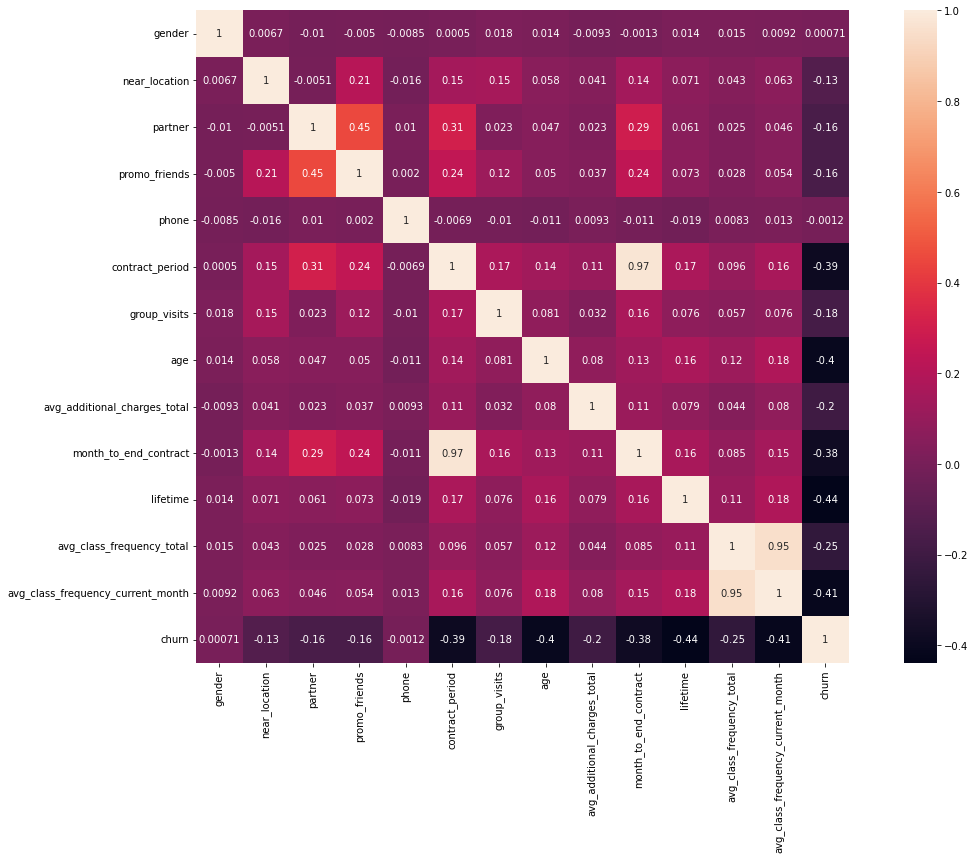

In [9]:
# построим матрицу корреляции признаков

cm = gym.corr()
fig, ax = plt.subplots()

sns.heatmap(cm, annot = True, square=True)
ax.set_ylim(
    14, 0
)
plt.gcf().set_size_inches(20, 12)
plt.show()

<div class="alert alert-info">

- сильно коррелируют между собой признаки "month_to_end_contract" и "contract_period"(97%), "avg_class_frequency_total" и "avg_class_frequency_current_month"(95%). Удалим перед построением моделей по одному признаку у каждой пары, чтобы они не влияли на качество обучения модели.
    
</div>

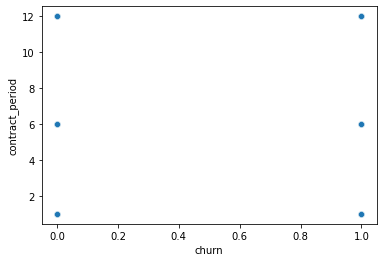

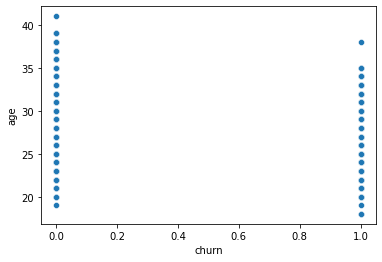

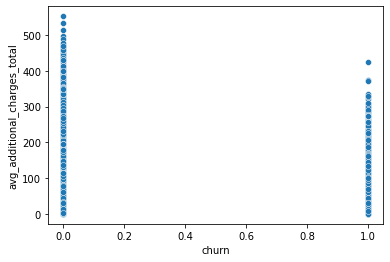

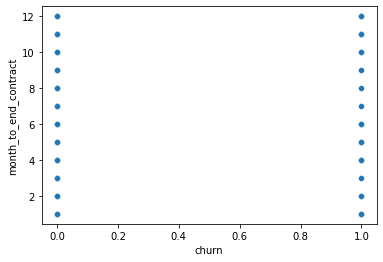

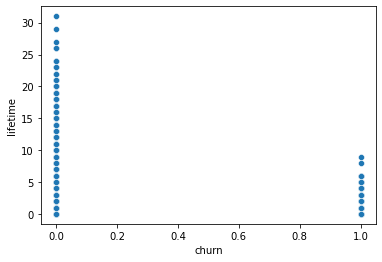

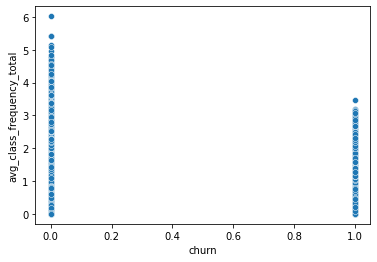

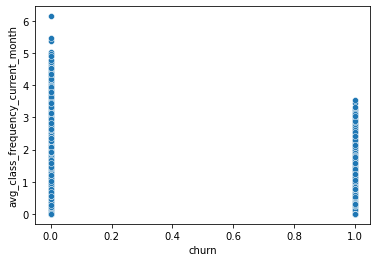

In [10]:
# Визуальные показатели корреляции признаков с оттоком

gym_sc = gym.drop(['gender', 'near_location', 'partner', 'promo_friends', 'phone', 'group_visits'], axis=1)
for col in gym_sc.drop('churn', axis = 1).columns:
    sns.scatterplot(x=gym_sc['churn'], y=gym_sc[col])
    plt.show()

<div class="alert alert-info">
    
- все виды абонементов по срокам присутствуют в сегментах оттока
- более взрослые клиенты менее склонны к оттоку
- клиенты которые тратят более 350 тысяч почти не попадают в отток
- клиенты, посещающие фитнес-центр более года, также практически не склонны к оттоку
- клиенты, в среднем посещающие более 3 раз в неделю, становятся постоянными
    
</div>

In [11]:
# удалим сильно коррелирующие признаки

gym_corr = gym.drop(['contract_period', 'avg_class_frequency_total'], axis=1)

## Построим модели прогнозирования оттока клиентов

In [12]:
# разделим наши данные на признаки (матрица X) и целевую переменную (y)
X = gym_corr.drop('churn', axis=1)
y = gym_corr['churn']

# разделяем модель на обучающую и валидационную выборку
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0
)

# зададим алгоритм "логистическая регрессия" для нашей модели
model = LogisticRegression(solver='liblinear')

# обучим модель
model.fit(X_train, y_train)

# воспользуемся уже обученной моделью, чтобы сделать прогнозы
probabilities = model.predict_proba(X_test)[:, 1]

# бинарный прогноз
predictions = model.predict(X_test)

# выводим все изученные метрики для полученного прогноза
print('Метрики для модели логистической регрессии:')
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, predictions)))
print('F1: {:.2f}'.format(f1_score(y_test, predictions)))
print('ROC_AUC: {:.2f}'.format(roc_auc_score(y_test, probabilities)))

Метрики для модели логистической регрессии:
Accuracy: 0.90
Precision: 0.80
Recall: 0.79
F1: 0.79
ROC_AUC: 0.96


In [13]:
# зададим алгоритм "случайный лес" для нашей модели
rf_model = RandomForestClassifier(n_estimators = 100, random_state=0)

# обучим модель
rf_model.fit(X_train, y_train)

# воспользуемся уже обученной моделью, чтобы сделать прогнозы
rf_probabilities = rf_model.predict_proba(X_test)[:, 1]

# бинарный прогноз
rf_predictions = rf_model.predict(X_test)

# выводим все изученные метрики для полученного прогноза
print('Метрики для модели случайного леса:')
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, rf_predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, rf_predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, rf_predictions)))
print('F1: {:.2f}'.format(f1_score(y_test, rf_predictions)))
print('ROC_AUC: {:.2f}'.format(roc_auc_score(y_test, rf_probabilities)))

Метрики для модели случайного леса:
Accuracy: 0.91
Precision: 0.83
Recall: 0.79
F1: 0.81
ROC_AUC: 0.95


#### Алгоритм случайного леса работает лучше. Посмотрим важность признаков "по весу"

In [14]:
importances = pd.DataFrame(rf_model.feature_importances_)
print(importances.sort_values(by=0, ascending=False))

           0
9   0.321614
10  0.209702
6   0.139873
7   0.124591
8   0.116619
5   0.019822
3   0.016033
2   0.015954
0   0.015723
1   0.011902
4   0.008165


<div class="alert alert-info">
    
#### Наиболее важными признаками являются 
- среднее количество посещений за последний месяц
- общий срок с первого посещения
    
<div>

## Кластеризация клиентов

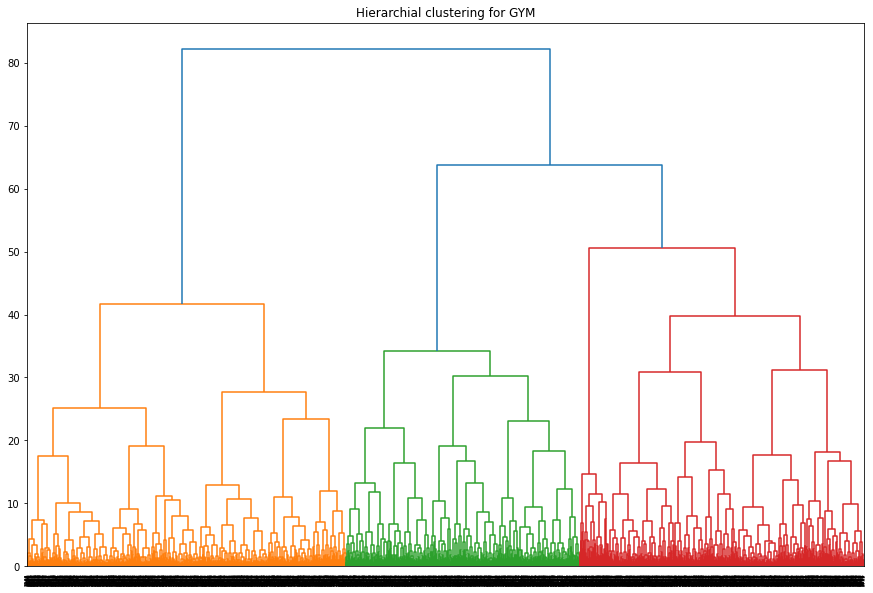

In [15]:
gym_clusters = gym_corr[['age', 'avg_additional_charges_total', 'month_to_end_contract', 'lifetime', 'avg_class_frequency_current_month', 'churn']]

scaler = StandardScaler() # создаём объект класса scaler (нормализатор)
X_sc = scaler.fit_transform(gym_clusters.drop(columns = ['churn'])) # обучаем нормализатор и преобразуем набор данных 

linked = linkage(X_sc, method = 'ward') 

plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Hierarchial clustering for GYM')
plt.show()

#### По дендрограмме видим что можно выделить 3-6 кластеров. Потестируем с помощью алгоритма K-Means на количество кластеров

In [16]:
# определим функцию отрисовки графиков попарных признаков для кластеров
def show_clusters_on_plot(df, x_name, y_name, cluster_name):
    plt.figure(figsize=(5, 5))
    sns.scatterplot(
        df[x_name], df[y_name], hue=df[cluster_name], palette='Paired'
    )
    plt.title('{} vs {}'.format(x_name, y_name))
    plt.show()

# стандартизируем данные
sc = StandardScaler()
x_sc = sc.fit_transform(gym_clusters)

# задаём модель k_means с числом кластеров 3 и фиксируем значение random_state
km = KMeans(n_clusters=3, random_state=0)
# прогнозируем кластеры для наблюдений (алгоритм присваивает им номера от 0 до 2)
labels = km.fit_predict(x_sc)

# сохраняем метки кластера в поле нашего датасета
gym_clusters['clusters'] = labels

# выводим статистику по средним значениям наших признаков по кластеру
display((gym_clusters.groupby(['clusters']).mean()).round(2).T)

C:\Users\Admin\AppData\Local\Temp\ipykernel_4144\446403212.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gym_clusters['clusters'] = labels


clusters,0,1,2
age,29.82,30.11,26.94
avg_additional_charges_total,186.80,141.44,114.91
month_to_end_contract,10.13,2.37,1.64
lifetime,4.72,4.72,0.99
avg_class_frequency_current_month,2.03,2.03,1.04
churn,0.00,0.00,0.99


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


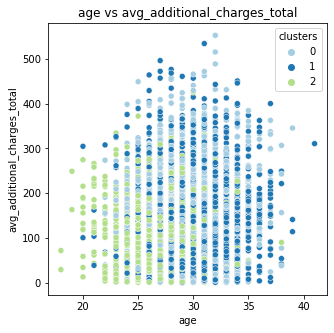

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


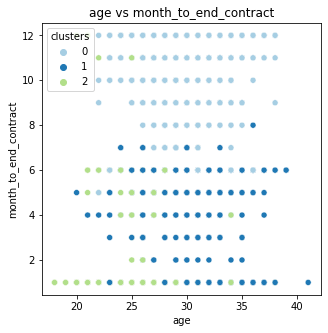

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


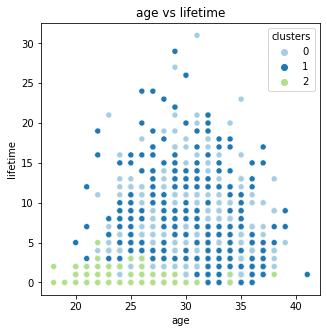

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


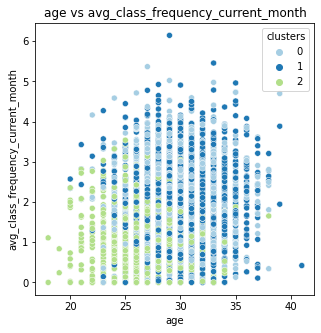

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


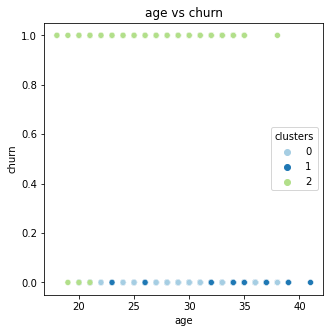

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


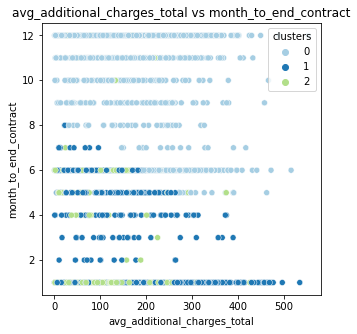

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


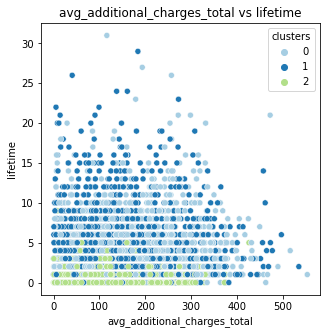

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


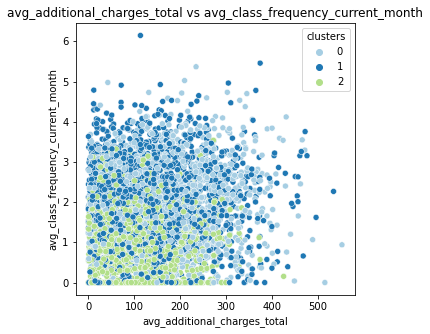

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


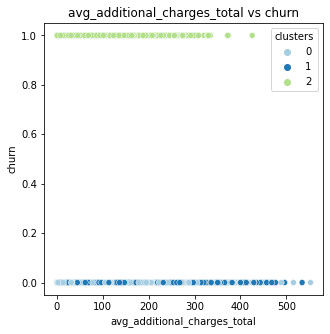

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


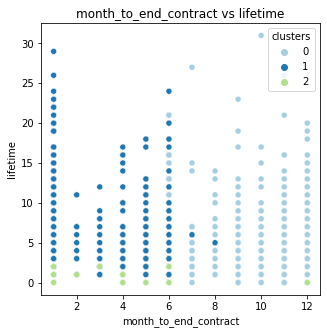

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


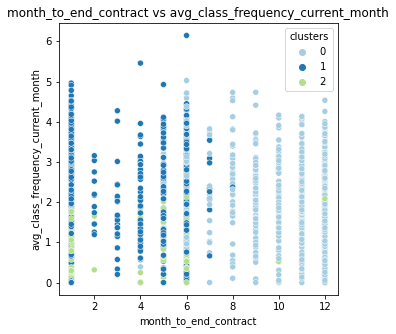

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


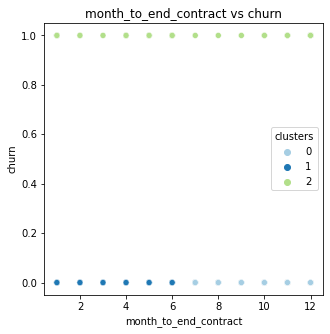

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


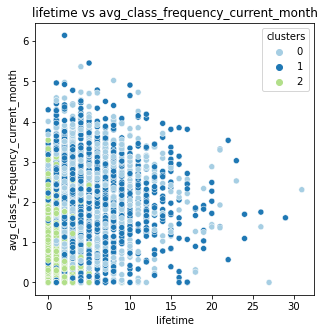

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


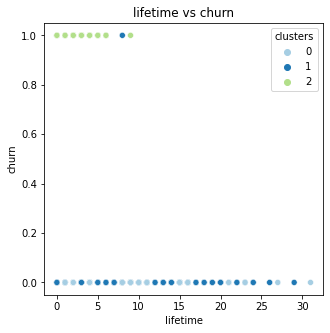

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


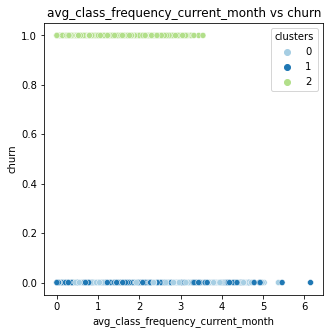

In [17]:
# отрисуем графики для попарных сочетаний признаков с разметкой по кластерам

col_pairs = list(itertools.combinations(gym_clusters.drop('clusters', axis=1).columns, 2))
for pair in col_pairs:
    show_clusters_on_plot(gym_clusters, pair[0], pair[1], 'clusters')

<div class="alert alert-info">
    
#### После итераций с значением К, по средним значениям с группировкой по кластерам можно выделить 3 явных кластера, где расстояния между значениями признаков очевидно.
    
- 0 и 1 кластеры обладают признаками постоянного клиента
- 2 кластер с признаками оттока
    
<div>

## Общие выводы и рекомендации

- большинство клиентов проживают в непосредственной близости от фитнес-центра, при этом данный признак слабо коррелирует к постоянству клиента
- признак корпоративного клиента влияет на снижение вероятности попадания в отток
- средний возраст клиентов 29 лет, в основном +-3 года, более возрастные клиенты более склонны к постоянству
- если клиент пользуется услугами фитнес-центра более 1 года, наиболее вероятно, что он не попадет в сегмент оттока
- если клиент за последний месяц посетил фитнес-центр не более 3 раз, он может быть склонен к оттоку, и соответственно если клиент посещает центр более 3 раз, вероятнее всего станут постоянными
- все виды абонементов по срокам присутствуют в сегменте оттока
- если средняя выручка на клиента более 150 тысяч, такой клиент менее склонен к оттоку
- наиболее важными по "весу" признаками являются среднее количество посещений за последний месяц и период с первого посещения
- по средним значениям с группировкой по кластерам можно выделить 3 явных кластера(0 и 1 кластеры обладают признаками постоянного клиента, 2 кластер с признаками оттока)
- доля оттока в среднем около 26%

#### Рекомендации:
- привлекать более возрастную категорию клиентов, и проработать причины склонности к оттоку менее возрастных клиентов путем опроса о причинах прекращения занятий
- отслеживать посещаемость клиентов и при снижении в последний месяц предлагать дополнительные "плюшки", услуги или скидки для удержания клиента
- разработать программу на первый год посещений для нового клиента, чтобы он в первый год не ушел в отток
- провести дополнительное исследование клиентов 2 кластера (оттока) и подобрать "триггеры" для их удержания и возвращения